<a href="https://colab.research.google.com/github/BalkisG77/Deep-Learning-/blob/main/TP_Sonar_31_neuronesipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pnd
observations = pnd.read_csv("/content/sonar.all-data.csv")

# PREPARATION DES DONNEES

In [2]:
print("Nbr colonnes: ",len(observations.columns))
#On ne prend que les données issues du sonar pour l'apprentissage
X = observations[observations.columns[0:60]].values

#On ne prend que les libellé
y = observations[observations.columns[60]]

#On encode : Les mines sont égales à 0 et les rochers égaux à 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

#On ajoute un encodage pour créer des classes :
# Si c'est une mine [1,0]
# Si c'est un rocher [0,1]
import numpy as np
n_labels = len(y)
n_unique_labels = len(np.unique(y))
one_hot_encode = np.zeros((n_labels,n_unique_labels))
one_hot_encode[np.arange(n_labels),y] = 1
Y=one_hot_encode

#Verification en prenant les enregistrement 0 et 97
print("Classe Rocher:",int(Y[0][1]))
print("Classe Mine :",int(Y[97][1]))

Nbr colonnes:  61
Classe Rocher: 1
Classe Mine : 0


# CREATION DES JEUX D'APPRENTISSAGE ET DE TEST

In [3]:

#On mélange
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state=1)

#Creation des jeux d'apprentissage
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=42)

# PARAMETRAGE DU RESEAU DE  NEURONES

In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
epochs = 600
nombre_neurones_entree = 60
nombre_neurones_sortie = 2
taux_apprentissage = 0.01

#Variable TensorFLow correspondant aux 60 valeurs des neurones d'entrée
tf_neurones_entrees_X = tf.placeholder(tf.float32,[None, 60])

#Variable TensorFlow correspondant au 2 neurones de sortie
tf_valeurs_reelles_Y = tf.placeholder(tf.float32,[None, 2])


poids = {
    # 60 neurones d'entrées vers 24 Neurones de la couche cachée
    'couche_entree_vers_cachee': tf.Variable(tf.random_normal([60, 31]), tf.float32),

    # 24 neurones de la couche cachée vers 2 de la couche de sortie
    'couche_cachee_vers_sortie': tf.Variable(tf.random_normal([31, 2]), tf.float32),
}

poids_biais = {
     #1 biais de la couche d'entrée vers les 24 neurones de la couche cachée
    'poids_biais_couche_entree_vers_cachee': tf.Variable(tf.zeros([31]), tf.float32),

    #1 biais de la couche cachée vers les 2 neurones de la couche de sortie
    'poids_biais_couche_cachee_vers_sortie': tf.Variable(tf.zeros([2]), tf.float32),
}




Instructions for updating:
non-resource variables are not supported in the long term


# FONCTION DE  CREATION DU RESEAU DE NEURONES

In [5]:
def reseau_neurones_multicouches(observations_en_entrees, poids, poids_biais):

    #Calcul de l'activation de la première couche
    premiere_activation = tf.sigmoid(tf.matmul(tf_neurones_entrees_X, poids['couche_entree_vers_cachee']) + poids_biais['poids_biais_couche_entree_vers_cachee'])

    #Calcul de l'activation de la seconde couche
    activation_couche_cachee = tf.sigmoid(tf.matmul(premiere_activation, poids['couche_cachee_vers_sortie']) + poids_biais['poids_biais_couche_cachee_vers_sortie'])

    return activation_couche_cachee

# CREATION DU RESEAU DE NEURONES

In [6]:
reseau = reseau_neurones_multicouches(tf_neurones_entrees_X, poids, poids_biais)

# ERREUR ET OPTIMISATION

In [7]:
#Fonction d'erreur de moyenne quadratique MSE
fonction_erreur = tf.reduce_sum(tf.pow(tf_valeurs_reelles_Y-reseau,2))

#Descente de gradient avec un taux d'apprentissage fixé à 0.1
optimiseur = tf.train.GradientDescentOptimizer(learning_rate=taux_apprentissage).minimize(fonction_erreur)

# APPRENTISSAGE

EPOCH (0/600) -  MSE: 126.34147
EPOCH (1/600) -  MSE: 124.892365
EPOCH (2/600) -  MSE: 123.68318
EPOCH (3/600) -  MSE: 122.67747
EPOCH (4/600) -  MSE: 122.1489
EPOCH (5/600) -  MSE: 122.08243
EPOCH (6/600) -  MSE: 123.355316
EPOCH (7/600) -  MSE: 124.124504
EPOCH (8/600) -  MSE: 126.821884
EPOCH (9/600) -  MSE: 123.75161
EPOCH (10/600) -  MSE: 126.69055
EPOCH (11/600) -  MSE: 122.71905
EPOCH (12/600) -  MSE: 125.98267
EPOCH (13/600) -  MSE: 121.99125
EPOCH (14/600) -  MSE: 125.41165
EPOCH (15/600) -  MSE: 121.26201
EPOCH (16/600) -  MSE: 124.78326
EPOCH (17/600) -  MSE: 120.61092
EPOCH (18/600) -  MSE: 124.16897
EPOCH (19/600) -  MSE: 119.99677
EPOCH (20/600) -  MSE: 123.55266
EPOCH (21/600) -  MSE: 119.421005
EPOCH (22/600) -  MSE: 122.94568
EPOCH (23/600) -  MSE: 118.874306
EPOCH (24/600) -  MSE: 122.34968
EPOCH (25/600) -  MSE: 118.35311
EPOCH (26/600) -  MSE: 121.768394
EPOCH (27/600) -  MSE: 117.85385
EPOCH (28/600) -  MSE: 121.203926
EPOCH (29/600) -  MSE: 117.3742
EPOCH (30/600)

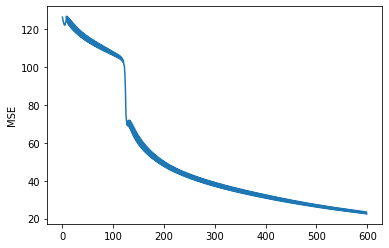

In [8]:
#Initialisation des variable
init = tf.global_variables_initializer()

#Demarrage d'une session d'apprentissage
session = tf.Session()
session.run(init)

#Pour la réalisation du graphique pour la MSE
Graphique_MSE=[]


#Pour chaque epoch
for i in range(epochs):

   #Realisation de l'apprentissage avec mise à jour des poids
   session.run(optimiseur, feed_dict = {tf_neurones_entrees_X: train_x, tf_valeurs_reelles_Y:train_y})

   #Calculer l'erreur
   MSE = session.run(fonction_erreur, feed_dict = {tf_neurones_entrees_X: train_x, tf_valeurs_reelles_Y:train_y})

   #Affichage des informations
   Graphique_MSE.append(MSE)
   print("EPOCH (" + str(i) + "/" + str(epochs) + ") -  MSE: "+ str(MSE))


#Affichage graphique
import matplotlib.pyplot as plt
plt.plot(Graphique_MSE)
plt.ylabel('MSE')
plt.show()

# VERIFICATION DE L'APPRENTISSAGE

In [9]:
#Les probabilités de chaque classe 'Mine' ou 'rocher' issues de l'apprentissage sont stockée dans le modèle.
#A l'aide de tf.argmax, on récupére les indexs des probabilités les plus elevées pour chaque observations
#Ex: Si pour une observation nous avons [0.56, 0.89] renverra 1 car la valeur la plus élevée se trouve à l'index 1
#Ex : Si pour une observation nous avons [0.90, 0.34 ]  renverra 0 car la valeur la plus élevée se trouve à l'index 0
classifications = tf.argmax(reseau, 1)

#Dans le tableau des valeurs réelles :
#Les mines sont encodées comme suit [1,0] l'index ayant la plus grande valeur est 0
#Les rochers ont pour valeur [0,1] sl'index ayant la plus grande valeur est 1

#Si la classification est de [0.90, 0.34 ] l'index ayant la plus grande valeur est 0
#Si c'est une mine [1,0] l'index ayant la plus grande valeur est 0
#Si les deux index sont identiques alors on peut affirmer que c'est une bonne classification
formule_calcul_bonnes_classifications = tf.equal(classifications, tf.argmax(tf_valeurs_reelles_Y,1))


#La précision se calcul en faisant la moyenne (tf.mean)
# des bonnes classifications (aprés les avoir converties en décimale tf.cast, tf.float32)
formule_precision = tf.reduce_mean(tf.cast(formule_calcul_bonnes_classifications, tf.float32))

 PRECISION SUR LES DONNEES DE TESTS

In [10]:
nb_classifications = 0;
nb_bonnes_classifications = 0

#On parcours l'ensemble des données de test (text_x)
for i in range(0,test_x.shape[0]):

    #On récupere les informations
    donneesSonar = test_x[i].reshape(1,60)
    classificationAttendue = test_y[i].reshape(1,2)

    # On réalise la classification
    prediction_run = session.run(classifications, feed_dict={tf_neurones_entrees_X:donneesSonar})

    #On calcule la précision de la classification à l'aide de la formule établie auparavant
    accuracy_run = session.run(formule_precision, feed_dict={tf_neurones_entrees_X:donneesSonar, tf_valeurs_reelles_Y:classificationAttendue})


    #On affiche pour observation la classe originale et la classification réalisée
    print(i,"Classe attendue: ", int(session.run(tf_valeurs_reelles_Y[i][1],feed_dict={tf_valeurs_reelles_Y:test_y})), " Classification: ", prediction_run[0] )

    nb_classifications = nb_classifications+1
    if(accuracy_run*100 ==100):
        nb_bonnes_classifications = nb_bonnes_classifications+1


print("-------------")
print("Précision sur les donnees de tests = "+str((nb_bonnes_classifications/nb_classifications)*100)+"%")

0 Classe attendue:  1  Classification:  1
1 Classe attendue:  0  Classification:  0
2 Classe attendue:  1  Classification:  1
3 Classe attendue:  1  Classification:  1
4 Classe attendue:  0  Classification:  0
5 Classe attendue:  1  Classification:  1
6 Classe attendue:  0  Classification:  0
7 Classe attendue:  1  Classification:  1
8 Classe attendue:  1  Classification:  1
9 Classe attendue:  0  Classification:  0
10 Classe attendue:  0  Classification:  0
11 Classe attendue:  0  Classification:  1
12 Classe attendue:  0  Classification:  0
13 Classe attendue:  0  Classification:  0
14 Classe attendue:  0  Classification:  1
15 Classe attendue:  0  Classification:  0
16 Classe attendue:  1  Classification:  1
17 Classe attendue:  0  Classification:  0
18 Classe attendue:  0  Classification:  1
19 Classe attendue:  0  Classification:  0
20 Classe attendue:  1  Classification:  1
21 Classe attendue:  0  Classification:  0
22 Classe attendue:  1  Classification:  1
23 Classe attendue:  

# PRECISION SUR LES DONNEES D'APPRENTISSAGE

In [11]:
nb_classifications = 0;
nb_bonnes_classifications = 0
for i in range(0,train_x.shape[0]):

    # On récupere les informations
    donneesSonar = train_x[i].reshape(1, 60)
    classificationAttendue = train_y[i].reshape(1, 2)

    # On réalise la classification
    prediction_run = session.run(classifications, feed_dict={tf_neurones_entrees_X: donneesSonar})

    # On calcule la précision de la classification à l'aide de la formule établie auparavant
    accuracy_run = session.run(formule_precision, feed_dict={tf_neurones_entrees_X: donneesSonar, tf_valeurs_reelles_Y: classificationAttendue})

    nb_classifications = nb_classifications + 1
    if (accuracy_run * 100 == 100):
        nb_bonnes_classifications = nb_bonnes_classifications + 1


print("Précision sur les donnees d'apprentissage = " + str((nb_bonnes_classifications / nb_classifications) * 100) + "%")

Précision sur les donnees d'apprentissage = 92.12121212121212%


# PRECISION SUR L'ENSEMBLE DES DONNEES

In [13]:
nb_classifications = 0;
nb_bonnes_classifications = 0
for i in range(0,207):

    prediction_run = session.run(classifications, feed_dict={tf_neurones_entrees_X:X[i].reshape(1,60)})
    accuracy_run = session.run(formule_precision, feed_dict={tf_neurones_entrees_X:X[i].reshape(1,60), tf_valeurs_reelles_Y:Y[i].reshape(1,2)})

    nb_classifications = nb_classifications + 1
    if (accuracy_run * 100 == 100):
        nb_bonnes_classifications = nb_bonnes_classifications + 1


print("Précision sur l'ensemble des données = " + str((nb_bonnes_classifications / nb_classifications) * 100) + "%")
session.close()


Précision sur l'ensemble des données = 90.33816425120773%
